In [2]:
import vehicles as v
from graphviz import Source, render

In [3]:
#Create manager that holds the threshold device
mng = v.manager(verbose = True)
#Create an input node
sns = v.sensor(mng,(1,1))
#Create threshold nodes
t1 = v.threshold(mng,1)
t2 = v.threshold(mng,2)
t3 = v.threshold(mng,2)
#Create output node/actuator
out = v.actuator(mng)

In [4]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,0)
t1.add_consumer(t1,1)
t2.add_consumer(t3,0)
t2.add_consumer(t1,1)
t3.add_consumer(out,0)
sns.add_consumer(t1,0,(0,0))
sns.add_consumer(t2,0,(0,0))
sns.add_consumer(t3,0,(0,0))

In [5]:
#Threshold node names
[t1.name, t2.name, t3.name]

['thr_7WK3', 'thr_GQOU', 'thr_1ANN']

In [6]:
#Current node values
mng.get_thresholds()

[0, 0, 0]

In [7]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_7WK3 --> thr_GQOU with : wire_UDR5
thr_7WK3 --| thr_7WK3 with : wire_LGFX
thr_GQOU --> thr_1ANN with : wire_AOAH
thr_GQOU --| thr_7WK3 with : wire_QLQG
thr_1ANN --> act_8KYY with : wire_OQEY


In [10]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='3p_network', directory='graph_output\\3pulse-demo', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_8KYY [color=black style=filled shape=doublecircle label="" width=0.30] thr_7WK3 [label ="1"] thr_GQOU [label ="2"] thr_1ANN [label ="2"] thr_7WK3 -> thr_GQOU [arrowhead="rnormal"] thr_7WK3 -> thr_7WK3 [arrowhead="tee"] thr_GQOU -> thr_1ANN [arrowhead="rnormal"] thr_GQOU -> thr_7WK3 [arrowhead="tee"] thr_1ANN -> act_8KYY [arrowhead="rnormal"] input_99BO [color=black style=filled shape=circle label="" width=0.25] input_99BO -> thr_7WK3 [arrowhead="rnormal"] input_99BO -> thr_GQOU [arrowhead="rnormal"] input_99BO -> thr_1ANN [arrowhead="rnormal"]}


'graph_output\\3pulse-demo\\3p_network.png'

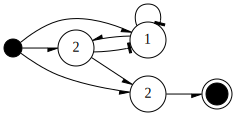

In [11]:
src

In [12]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    sns.feed([[1]])
    #Update
    mng.update()

Initial thresholds : 
[0, 0, 0]
[1]
Thresholds at time 0 after the signal: 
[1, 1, 1]
Threshold outputs at time 0
thr_7WK3 --> wire_UDR5
thr_7WK3 --| wire_LGFX
Thresholds at time 0 after threshold update: 
[0, 0, 0]
Wire outputs at time 0
thr_7WK3 --> thr_GQOU with : wire_UDR5
thr_7WK3 --| thr_7WK3 with : wire_LGFX
thr_GQOU --- thr_1ANN with : wire_AOAH
thr_GQOU --- thr_7WK3 with : wire_QLQG
thr_1ANN --- act_8KYY with : wire_OQEY
Thresholds at time 0 after wire update: 
[-1, 1, 0]
[1]
Thresholds at time 1 after the signal: 
[0, 2, 1]
Threshold outputs at time 1
thr_GQOU --> wire_AOAH
thr_GQOU --| wire_QLQG
Thresholds at time 1 after threshold update: 
[0, 0, 0]
Wire outputs at time 1
thr_7WK3 --- thr_GQOU with : wire_UDR5
thr_7WK3 --- thr_7WK3 with : wire_LGFX
thr_GQOU --> thr_1ANN with : wire_AOAH
thr_GQOU --| thr_7WK3 with : wire_QLQG
thr_1ANN --- act_8KYY with : wire_OQEY
Thresholds at time 1 after wire update: 
[-1, 0, 1]
[1]
Thresholds at time 2 after the signal: 
[0, 1, 2]
Thresh